# Image Processing SoSe 22 - Assignment 06

### Deadline is 09.06.2022 at 11:55 am

Please solve the assignments together with a partner.
I will run every notebook. Make sure the code runs through. Select `Kernel` -> `Restart & Run All` to test it.

In [1]:
# display the plots inside the notebook
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
import scipy.io.wavfile
from io import BytesIO
import urllib.request as urllib2
import ssl
import IPython.display as adt
import math
from scipy import signal
import cmath
ssl._create_default_https_context = ssl._create_unverified_context
pylab.rcParams['figure.figsize'] = (12, 12)   # This makes the plot bigger

# Exercise 1 - Cross Correlation - 2 Points
Implement a function myCrossCorrelation, which takes two discrete functions in the form of arrays as an input and outputs the resulting crosscorrelation function. Now apply your correlation function as follows:
a) use as input function 1 an array of 10 random numbers (0-255), function 2 shall be [1 2 3], plot the two functions and the result of the crosscorrelation of both.
b) use the same function 1 as in a), function b) shall be [2 2 2]. Plot the two functions and the crosscorrelation of both.
c) repeat the first two tasks but swap the arguments

In [3]:
def myCrossCorrelation(func1, func2):
    g = [0]*(len(func1)+len(func2)-1)
    func2_x = [func2[-1]]
    for i in range (len(g)):
        for j in range (min(len(func1),len(func2_x))):
            g[i] = g[i] + func1[j]*func2_x[j]
        try:
            func2_x.insert(0,func2[-i-2])
        except:
            func2_x.insert(0,0)
    return g

In [4]:
func1 = [1,5,6,12,8,23,5,8,9,10]
func2 = [1,2,3]

print(signal.correlate(func2, func1))    #Zur Überprüfung

print(myCrossCorrelation(func2,func1))

[10 29 56 48 57 69 97 54 53 29 17  3]
[10, 29, 56, 48, 57, 69, 97, 54, 53, 29, 17, 3]


# Exercise 2 - DFT - 1 Point

Provide an orthogonal DFT matrix which can be used to transform one-dimensional signals of length 7. Calculate all elements (do not use variables) of the matrix.

In [5]:
#orthogonal DFT Matrix size 7:

#(1/sqrt(7)) * [[ 1.          1.                        1.                      1.                      1.                   1.                       1.                      ]
#               [ 1.          0.6234898+0.78183148i  -0.22252093+0.97492791i -0.90096887+0.43388374i -0.90096887-0.43388374i -0.22252093-0.97492791i  0.6234898-0.78183148i   ]
#               [ 1.         -0.22252093+0.97492791i -0.90096887-0.43388374i  0.6234898-0.78183148i   0.6234898+0.78183148i  -0.90096887+0.43388374i -0.22252093-0.97492791i  ]
#               [ 1.         -0.90096887+0.43388374i  0.6234898-0.78183148i  -0.22252093+0.97492791i -0.22252093-0.97492791i  0.6234898+0.78183148i  -0.90096887-0.43388374i  ]
#               [ 1.         -0.90096887-0.43388374i  0.6234898+0.78183148i  -0.22252093-0.97492791i -0.22252093+0.97492791i  0.6234898-0.78183148i  -0.90096887+0.43388374i  ]
#               [ 1.         -0.22252093-0.97492791i -0.90096887+0.43388374i  0.6234898+0.78183148i   0.6234898-0.78183148i  -0.90096887-0.43388374i -0.22252093+0.97492791i  ]
#

# Exercise 3 - FFT - 2 Points

Calculate the FFT of the following signal:

`49, 38, 11, 32, 71, 07, 46, 77`

Make sure, that the resulting frequencies are normalized as shown on the lecture slides of DFT - but normalize only after the last calculation step.

Use the diagram below and provide ALL the inputs and outputs for EVERY stage.

![FFT](butterfly01.jpg)

In [6]:
#a1 = 49 -> a1+a5=120               -> 177      -> 331

#a2 = 38 -> a2+a6=45                -> 154      -> 23

#a3 = 11 -> a3+a7=57                -> 63       -> 63+64i

#a4 = 32 -> a4+a8=109               -> 64i      -> 63-64i

#a5 = 71 -> (a1-a5)=-22             -> -22-35i  -> 54-49i

#a6 = 07 -> (a2-a6)*(-14/31)i=-14i  -> 76-14i   -> -98-21i

#a7 = 46 -> (a3-a7)i=-35i           -> 35i-22   -> -98+21i

#a8 = 77 -> (a4-a8)*(76/45)i=76     -> -14i-76  -> 54+49j


#=> (1/sqrt(8)) * [331, 54+49i, 63+64i, -98-21i, 23, -98+21i, 63-64j, 54-49j]

# Exercise 4 - Discrete Fourier Transformation - 2 Points
Implement the Discrete Fourier Transformation with [Matrix Multiplication](https://en.wikipedia.org/wiki/DFT_matrix).

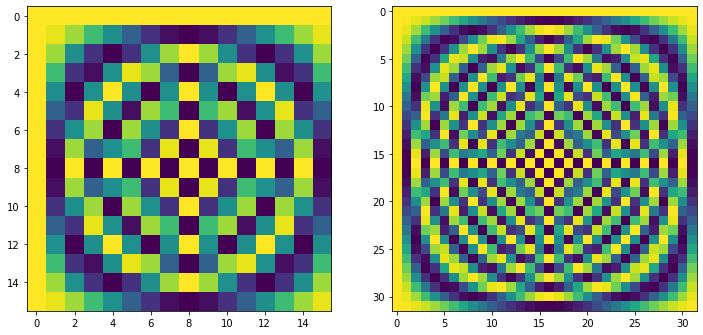

In [7]:
def dft_matrix(n):
    """
    Returns the Discrete Fourier Transformation Matrix of order `n`.
    """
    w = cmath.exp((2 * cmath.pi * 1j) / n)
    W = np.zeros((n,n))
    for i in range(n):
        for k in range(n):
            W[i][k] = ((complex(1/math.sqrt(n),0)) * (w**(i*k))).real
    return W

plt.subplot(121)
plt.imshow(dft_matrix(16))
plt.subplot(122)
plt.imshow(dft_matrix(32))
plt.show()

# Exercise 5 - Spectrogram - 3 Points

A [spectrogram](https://en.wikipedia.org/wiki/Spectrogram) visualises the intensities of the different frequencies over time. On the x-axis is the time and on the y-axis are the frequencies.
Your task is to build the spectrogram of the given audio clip. If you failed to do exercise 4, you can use some library for the fourier transformation.

In [8]:
def load_wav(url):
    f = urllib2.urlopen(url)
    buffer = BytesIO(f.read())
    sample_rate, audio = scipy.io.wavfile.read(buffer)
    if len(audio.shape) == 2:
        # only select one channel
        audio = audio[:, 0]
    return sample_rate, audio / audio.max()

In [9]:
dolphines_url = "http://www.pmel.noaa.gov/acoustics/whales/sounds/whalewav/akhumphi1x.wav"
# some dolphin sounds
sample_rate, audio = load_wav(dolphines_url)

In [10]:
print(audio.shape)

(377006,)


In [11]:
# listen to the audio
adt.Audio(data=audio, rate=sample_rate)

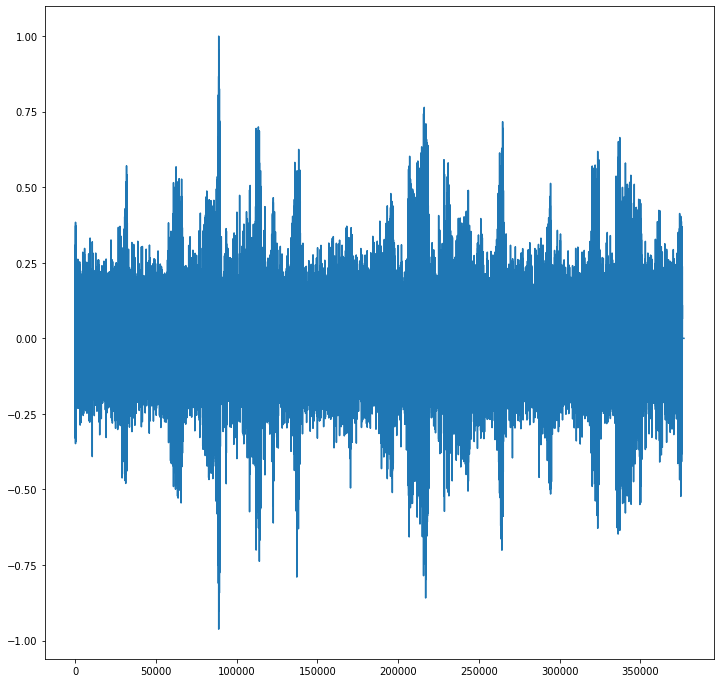

In [12]:
# plot the values.
plt.plot(audio)
plt.show()

In [13]:
def spectogram(audio, window_size=500):
    """
    Builds the spectogram of the audio clip. Split the audio clip into buckets of `window_size` and 
    use the discrete fourier transformation to get the intensity of the frequencies.
    The entry at position (i, j) of the matrix is the intensity of the i-th frequencies in the j-th bucket.
    """
    # your code here
    return np.zeros((window_size // 2, len(audio) // window_size))

In [14]:
specgram = spectogram(audio, window_size=500)

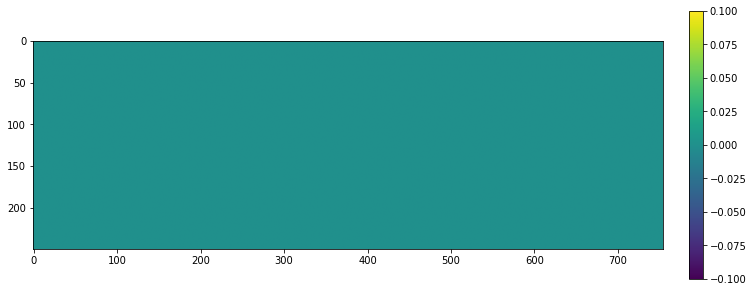

In [15]:
im = plt.imshow(specgram)
plt.colorbar(im, fraction=0.02, pad=0.04)
plt.show()

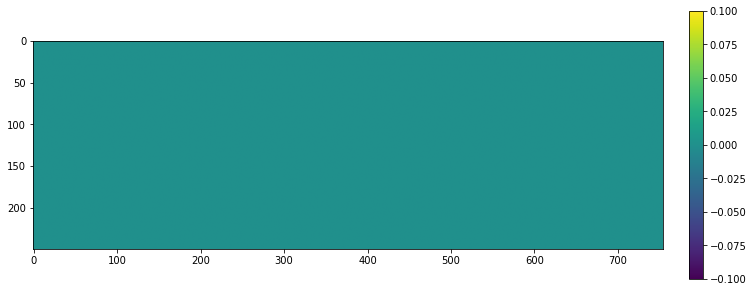

In [16]:
# plot it logarithmically
im = plt.imshow(specgram)    # your code here
plt.colorbar(im, fraction=0.02, pad=0.04)
plt.show()